En este Notebook, se entrenará un modelo con la arquitectura del mejor modelo seleccionado, pero utilizando todos los datos de entrenamiento, y luego evaluando en un conjunto de datos que el modelo jamás ha visto.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

Mounted at /content/drive


In [5]:
# =============== PARÁMETROS BÁSICOS ===============
img_height, img_width = 28, 28
batch_size = 32

# RUTA
train_dir = "/content/drive/MyDrive/Proyecto Final IA/Train"
test_dir = "/content/drive/MyDrive/Proyecto Final IA/Test"

In [7]:
# Generador de entrenamiento
train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=5,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.05
)

train_generator_aug = train_datagen_aug.flow_from_directory(
    train_dir,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Generador para test
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print("Clases detectadas:", train_generator_aug.class_indices)
print()
print("Clases detectadas:", test_generator.class_indices)

Found 6403 images belonging to 10 classes.
Found 1833 images belonging to 10 classes.
Clases detectadas: {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}

Clases detectadas: {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}


In [14]:
best_model = models.Sequential()
best_model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
best_model.add(layers.BatchNormalization())
best_model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
best_model.add(layers.MaxPooling2D((2,2)))

best_model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
best_model.add(layers.BatchNormalization())
best_model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
best_model.add(layers.MaxPooling2D((2,2)))
best_model.add(layers.Dropout(0.4))

best_model.add(layers.Flatten())
best_model.add(layers.Dense(128, activation="relu"))
best_model.add(layers.Dropout(0.2))
best_model.add(layers.Dense(128, activation='relu'))
best_model.add(layers.Dense(64, activation='relu'))
best_model.add(layers.Dropout(0.1))
best_model.add(layers.Dense(32, activation='relu'))
best_model.add(layers.Dense(10, activation='softmax'))

In [16]:
#Optimizador
opt=tf.keras.optimizers.Adam(learning_rate=0.001)

# Funcion de paro
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='accuracy',patience=8,restore_best_weights=True)

from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='loss',
    factor=0.5,
    patience=4,
    min_lr=1e-6,
    verbose=1
)

best_model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

best_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 494,090 (1.88 MB)

 Trainable params: 493,898 (1.88 MB)

 Non-trainable params: 192 (768.00 B)

In [17]:
# Entrenamiento con todo el conjunto de datos de entrenamiento
history_best_model = best_model.fit(train_generator_aug, epochs=100, callbacks=[early_stop, reduce_lr])

Epoch 1/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 59s 257ms/step - accuracy: 0.1606 - loss: 2.2698 - learning_rate: 0.0010
Epoch 2/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 49s 246ms/step - accuracy: 0.5254 - loss: 1.3600 - learning_rate: 0.0010
Epoch 3/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 51s 252ms/step - accuracy: 0.6568 - loss: 1.0414 - learning_rate: 0.0010
Epoch 4/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 51s 254ms/step - accuracy: 0.7333 - loss: 0.8282 - learning_rate: 0.0010
Epoch 5/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 48s 240ms/step - accuracy: 0.7697 - loss: 0.7110 - learning_rate: 0.0010
Epoch 6/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 49s 242ms/step - accuracy: 0.7825 - loss: 0.6468 - learning_rate: 0.0010
Epoch 7/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 51s 255ms/step - accuracy: 0.8114 - loss: 0.5966 - learning_rate: 0.0010
Epoch 8/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 51s 255ms/step - accuracy: 0.8302 - loss: 0.5300 - learning_rate: 0.0010
Epoch 9/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 52s 257ms/step - accuracy: 0.8374 - loss: 0.503

In [18]:
# Guardar el modelo

best_model.save("best_model.keras")

In [19]:
# Evaluación del modelo con el conjunto de datos de prueba
test_loss, test_acc = best_model.evaluate(test_generator)

print("Pérdida en el conjunto de prueba:", test_loss)
print()
print("Accuracy en el conjunto de prueba:", test_acc)

58/58 ━━━━━━━━━━━━━━━━━━━━ 1464s 26s/step - accuracy: 0.8978 - loss: 0.3965
Pérdida en el conjunto de prueba: 0.40478596091270447

Accuracy en el conjunto de prueba: 0.9034369587898254


Después de haber evaluado en el conjunto de datos de pureba, el modelo obtuvo un *accuracy* similar que al de validación, pero un poco más bajo. Probablemente se debe a que el sonjunto de datos de prueba ciego es mucho mayor que el de validación, y es más probable que existan imágenes más "raras" o complicadas para el modelo. A continuación, se generará una matriz de confusión para visualizar las predicciónes hechas por el modelo.

58/58 ━━━━━━━━━━━━━━━━━━━━ 17s 270ms/step


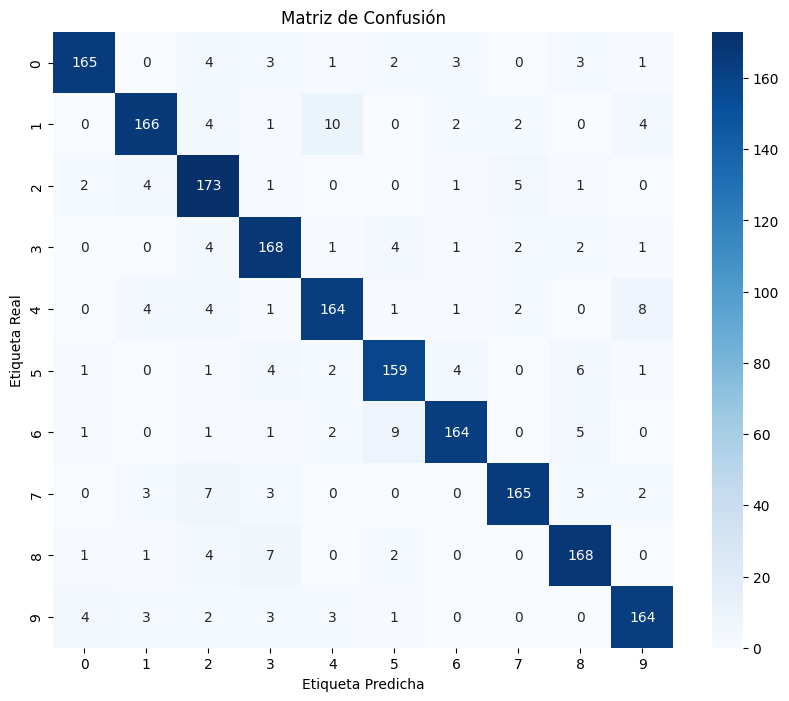

In [20]:
# Predicción de las etiquetas en el conjunto de prueba
test_predictions = best_model.predict(test_generator)

# Convertir las predicciones a etiquetas
predicted_labels = np.argmax(test_predictions, axis=1)


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
conf_matrix = confusion_matrix(test_generator.classes, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title("Matriz de Confusión")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()


En la matriz de confusión, la diagonal muestra los dígitos correctamente predichos, mientras que cualquier otro número fuera de la diagonal es una predicción erronea. Observamos que la gran mayoría están en la diagonal y existen muy pocos errores a comparación. La más notable sería el 1, al cual el modelo predijo 10 veces como "4", o el 4, que el modelo predijo 8 veces que es un "9".

In [21]:
from sklearn.metrics import classification_report

# Obtener las etiquetas reales del test_generator
y_true = test_generator.classes

# Obtener las etiquetas predichas del modelo
y_pred = predicted_labels

# Obtener los nombres de las clases
class_names = list(test_generator.class_indices.keys())

# Generar el reporte de clasificación
report = classification_report(y_true, y_pred, target_names=class_names)

print("Reporte de Clasificación:\n")
print(report)

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       182
           1       0.92      0.88      0.90       189
           2       0.85      0.93      0.88       187
           3       0.88      0.92      0.90       183
           4       0.90      0.89      0.89       185
           5       0.89      0.89      0.89       178
           6       0.93      0.90      0.91       183
           7       0.94      0.90      0.92       183
           8       0.89      0.92      0.91       183
           9       0.91      0.91      0.91       180

    accuracy                           0.90      1833
   macro avg       0.90      0.90      0.90      1833
weighted avg       0.90      0.90      0.90      1833



Por último se generó un reporte con métricas interesantes del modelo. Observamos que la presición más baja es para el dígito "2", con 0.85, y la más alta es "0" con 0.95. La sensibilidad más baja resultó ser del "1", con 0.88, y lo mismo ocurrió para el F1-score, pero para el dígito "2". En general vemos un buen balance en las métricas, pues para ningun dígito caen de manera exagerada.